## Stochastic Gradient Descent
When training set is large **Batch Gradient Descent** becomes very slow as it uses the whole training set to compute the gradients at every step.
** Stochastic Gradient Descent** works differently by;
* picking a random instance in the training set at every step
* computes the gradient based on only that instance.
The algorithm is less regular in comparison to Batch Gradient Descent.(Due to its  Stochastic nature).
* The cost function does not decrease gently till it reaches the minimum. 
* It bounces up and down instead decreasing on average.
* Ends up close to the minimum and keeps bouncing around it never settling on the minimum
* When it stops the final parameter value is not necessarily *optimal*
* This irregular cost function could help jump out **local minima**. Effectively better for finding Global Minimum than Batch Gradient Descent


#### Implementing Stochastic Gradient Descent with a simple learning schedule


In [1]:
import numpy as np
import numpy.linalg as LA
import numpy.random as rnd
import os
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
np.random.seed(42)

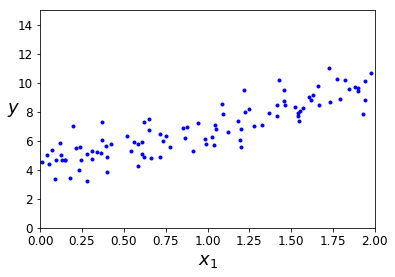

In [2]:

#Generate random linear looking data
X = 2 * rnd.rand(100, 1)
y = 4 + 3 * X + rnd.randn(100, 1)

# plot it
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [3]:
x = np.ones((100, 1)) 
X_b = np.c_[x, X] # concatenate our features to array vector of 1's
#theta_best = LA.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

In [4]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

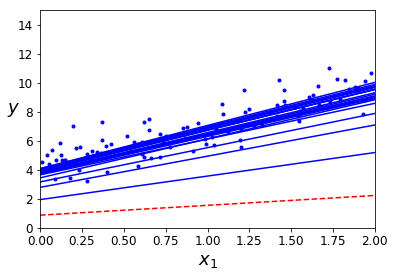

In [7]:

n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t + t1)

theta = np.random.rand(2,1) # Random init
for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if i > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + 1)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X,y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.show()


In [8]:
theta

array([[ 4.18533593],
       [ 2.7815848 ]])

We have only iterated through the training set 50 times and still reached a fairly descent value for theta.

In [9]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=50, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, verbose=0, warm_start=False)

In [10]:
sgd_reg.intercept_,sgd_reg.coef_

(array([ 4.16782089]), array([ 2.72603052]))